In [1]:
%matplotlib inline

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import math

from intersection_functions import *

In [10]:
def plot_objects(a, b, x, spiral_radius_velocity, spiral_angle_velocity, init_spiral_angle):

    
    y_lim = (-20, 20)
    y = a * x + b
    
    y_oppisite = a * x - b
    
    line_vec_magnitude = get_line_vector_magnitude(x, a, b)
    
    spiral_vec_magnitude = line_vec_magnitude
    
    min_distance, angle_to_line = get_little_radius_vec(a, b)
    print('Min distance: ', min_distance)

    create_field()
    
    x_line, y_line = create_line(a, b, (-20, 20))
    
    x_opposite, y_opposite = create_line(a, -b, y_lim)
    
    x_help_line, y_help_line = create_line(a, 0, y_lim)
    
    
    
    x_spiral, y_spiral = create_spiral(r_incr_velocity = spiral_radius_velocity, 
                                       init_angle = init_spiral_angle,
                                       angle_velocity = spiral_angle_velocity,
                                       )
 
    spiral_vec_coords = get_spiral_vec_coords(spiral_vec_magnitude, 
                                              spiral_radius_velocity,
                                              spiral_angle_velocity,
                                              init_spiral_angle)
    
    distance_between_vectors = distance((x, y), (spiral_vec_coords[2], spiral_vec_coords[3]))
    

    # Plot linear function
    plt.plot(x_line, y_line, color='blue', linewidth=1, linestyle='-')
    
    # Plot opposite linear function
    plt.plot(x_opposite, y_opposite, color='blue', linewidth=1, linestyle='-')
    
    # Help line
    plt.plot(x_help_line, y_help_line, color='green', linewidth=1, linestyle='-')
    
    if b >0:
        angle_to_line += np.pi/2
    elif b <0:
        angle_to_line -= np.pi/2
        
    # Min distance from center to line
    plt.quiver(0,0,min_distance * np.cos(angle_to_line), min_distance * np.sin(angle_to_line),
               scale_units = "xy", scale = 1, linewidth = 0.01, color = 'black')

    
    
    
    # Plot spiral
    plt.plot(x_spiral, y_spiral, color = 'red', linewidth = 1, linestyle = '-')
    
    y_intersects = get_y_intersection_points(spiral_radius_velocity, spiral_angle_velocity, init_spiral_angle, y_lim)
    
    line_angle = get_angle(a, degrees= False) + np.pi
  
    for points in y_intersects:
        plt.scatter(points[0], points[1], color= 'black', s = 20)
        
    updated_y_intersection_points, real_intersection_points = rotate_y_intersection_points(a,b, y_intersects,line_angle, init_spiral_angle,
                                                                 spiral_radius_velocity, spiral_angle_velocity, min_distance)
    opposite_y_intersection_points, real_opposites_intersections = rotate_y_intersection_points(a,-b, y_intersects,line_angle, init_spiral_angle,
                                                                 spiral_radius_velocity, spiral_angle_velocity, min_distance)
         
    for i in range(len(updated_y_intersection_points)):
        y_point = updated_y_intersection_points[i]
        y_real_point = real_intersection_points
        plt.scatter(y_point[0], y_point[1], color= 'green', s = 20)
        plt.scatter(y_real_point[0], y_real_point[1], color= 'purple', s = 20)
        
    for i in range(len(opposite_y_intersection_points)):
        y_point = opposite_y_intersection_points[i]
        y_real_point = real_opposites_intersections
    
        plt.scatter(y_real_point[0], y_real_point[1], color= 'purple', s = 20)
        
        
#     # Plot left vertical line with x = -min_distance
#     plt.axvline(-min_distance, 0,1, color='black', linestyle='-', linewidth=1)
    
    
#     plt.scatter(-11.235659884324425, -9.709666458823545, color= 'y', s = 20)
    
#     plt.scatter(-11.235659884324445, -18.259616144115913, color= 'y', s = 20)
    
    
#     plt.scatter(-11.23565988432439, 7.564194904593029, color= 'y', s = 20)
    
#     # Length of the point above
    
#     L = distance([0,0], [-11.23565988432439, 7.564194904593029])
    
#     T = L/ spiral_radius_velocity
#     y_dot_slope = 7.564194904593029/-11.23565988432439
    
#     y_dot_angle = init_spiral_angle + T*spiral_angle_velocity
#     y_dot_angle_pi = np.pi + get_angle(y_dot_slope) - angle_to_line
    
#     delta_T = y_dot_angle_pi/ spiral_angle_velocity
#     y_dot_T = y_dot_angle/spiral_angle_velocity
    
    
#     # Angle of the min distance to the line
#     angl = np.pi - angle_to_line
    
#     rotation_y_dot_angle = y_dot_angle - angl
    
#     t_param = angl/spiral_angle_velocity
#     new_T = (rotation_y_dot_angle - init_spiral_angle)/spiral_angle_velocity
    
    
#     # y_dot_angle = get_angle(y_dot_slope)
#     print('Yellow dot slope: ', y_dot_slope,'y_dot_angle_pi: ',y_dot_angle_pi , 'Yellow dot angle: ',y_dot_angle, 'Ydot T: ', y_dot_T )
#     print('New T: ', new_T)
#     n_x = new_T/spiral_angle_velocity * spiral_radius_velocity * np.cos(new_T * spiral_angle_velocity)
#     n_y = new_T/spiral_angle_velocity * spiral_radius_velocity * np.sin(new_T * spiral_angle_velocity)
#     plt.scatter(n_x, n_y, color= 'blue', s = 40)
#     # print(L,T,'Angl: ',angl,'Angle to Line: ', np.pi - angle_to_line ,t_param, new_T)
    

#     plt.scatter(-11.23565988432439, 15.894706315211256, color= 'y', s = 20)
    
#     # left_v_line_intersects, right_v_line_itersects = [], []
    
#     # Calculations for left vertical line`s intersecion points
# #     for point in y_intersects:
# #         left_x, left_y = calc_angles_sequence_limit(b, point[1], spiral_radius_velocity, 
# #                                 init_spiral_angle, spiral_angle_velocity, -min_distance)
# #         plt.scatter(left_x, left_y, color= 'orange', s = 20)
    
#     # Plot right vertical line with x = min_distance
#     plt.axvline(min_distance, 0,1, color='black', linestyle='-', linewidth=1)
    
#     plt.scatter(11.235659884324404, 14.296815092807552, color= 'y', s = 20)
    
    
#     plt.scatter(11.235659884324386, -12.027851631191657, color= 'y', s = 20)
                                                                 
    plt.show()

Min distance:  7.6844588847969515


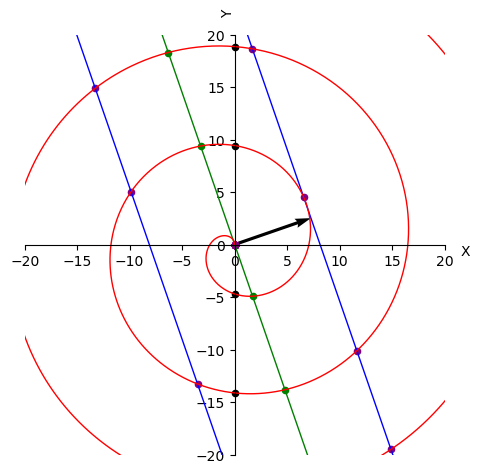

In [28]:
# Define line and spiral variables
a = -2.89
# b = 34.36
b = 23.5
x = 1

spiral_radius_velocity = 1.5
init_spiral_angle = np.pi/2
spiral_angle_velocity = 1

plot_objects(a, b, x,spiral_radius_velocity, spiral_angle_velocity, init_spiral_angle)
# plot_vectors_distances(a, b, spiral_radius_velocity, spiral_angle_velocity, init_spiral_angle, x_range)